In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df_alumn = pd.read_csv('name_and_school.csv')
df_alumn['Name'] = 'John Doe'

# Save the modified CSV
df_alumn.to_csv('name_and_school_modified.csv', index=False)


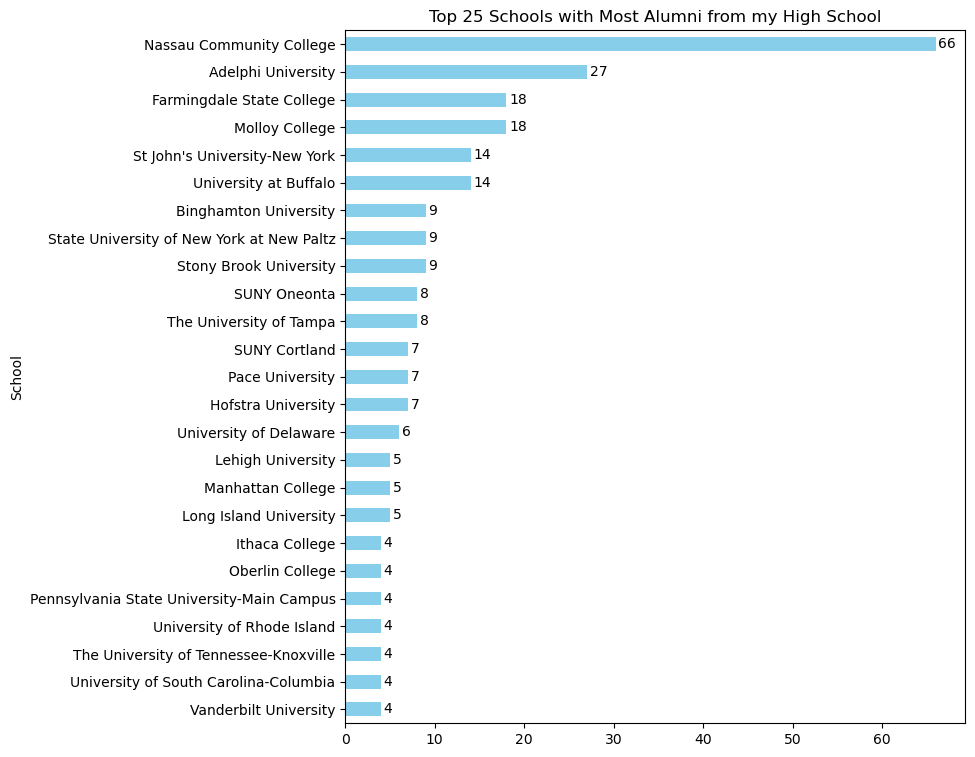

In [8]:
"""
school_counts = df_alumn['School'].value_counts()

school_top25 = school_counts.head(25)

school_top25.plot(kind='barh', figsize=(8, 9), color='skyblue')

plt.title('Top 10 Schools with Most Alumni from my High School')

plt.gca().invert_yaxis()
"""

school_counts = df_alumn['School'].value_counts()

school_top25 = school_counts.head(25)

ax = school_top25.plot(kind='barh', figsize=(8, 9), color='skyblue')

plt.title('Top 25 Schools with Most Alumni from my High School')

plt.gca().invert_yaxis()

# Add counts to the bars
for i, v in enumerate(school_top25):
    ax.text(v + 0.3, i, str(v), color='black', va='center')


In [9]:
import pandas as pd
from geopy.geocoders import Nominatim
import time
import folium

# 1) counts from original alumni dataframe
school_counts = df_alumn['School'].value_counts()              # Series: index=School, value=count

# 2) get unique schools (or you may already have a list)
unique_schools = df_alumn['School'].unique()
schools_df = pd.DataFrame(unique_schools, columns=['School'])

# 3) map counts onto schools_df (missing -> 0)
schools_df['Count'] = schools_df['School'].map(school_counts).fillna(0).astype(int)

# 4) geocode (or fill from your existing coordinates)
geolocator = Nominatim(user_agent="school_mapper")
manual_coords = {
    'Marist College': (41.7015, -73.9204),
    'Beacon College': (28.8165, -81.8815),
    'CUNY Brooklyn College': (40.6315, -73.9523),
    'Bowling Green State University-Main Campus': (41.377036, -83.637531),
    'California University of Pennsylvania': (40.063561, -79.884237),
    'Jefferson (Philadelphia University + Thomas Jefferson University)': (39.94911, -75.15781),
    'Ohio State University-Main Campus': (39.99949343, -83.00879179),
    'Pennsylvania State University-Main Campus': (40.80073, -77.86),
    "St John's University-New York": (40.72, -73.8),
    'SUNY College at Geneseo': (42.802701, -77.82),
    'SUNY College at Old Westbury': (40.7965621, -73.5730895),
    'SUNY College at Oswego': (43.4536747, -76.534784),
    'SUNY College at Plattsburgh': (44.695365, -73.458593),
    'SUNY College of Agriculture and Technology at Cobleskill': (42.672534, -74.498258),
    'SUNY College of Environmental Science and Forestry': (43.03, -76.14),
    'SUNY College of Technology at Alfred': (42.255262, -77.794632),
    'SUNY College of Technology at Delhi': (42.269859, -74.924612),
    'The Sage Colleges': (42.73, -73.69),
    'The University of Tampa': (27.95, -82.47),
    'The University of Tennessee-Knoxville': (35.956596, -83.927499),
    'United States Coast Guard Academy': (41.37, -72.1),
    # add more overrides...
}

def get_coords(school_name):
    if school_name in manual_coords:
        return manual_coords[school_name]
    try:
        loc = geolocator.geocode(school_name + ", USA")   # adding ", USA" often helps
        if loc:
            return loc.latitude, loc.longitude
    except Exception:
        pass
    return None, None

coords = [get_coords(s) for s in schools_df['School']]
time.sleep(1)   # consider larger sleep inside loop if many requests
schools_df['Latitude'] = [c[0] for c in coords]
schools_df['Longitude'] = [c[1] for c in coords]

# 5) build folium map with tooltip
map_center = [schools_df['Latitude'].dropna().mean(), schools_df['Longitude'].dropna().mean()]
m = folium.Map(location=map_center, zoom_start=4)

for idx, row in schools_df.iterrows():
    lat, lon = row['Latitude'], row['Longitude']
    if pd.notnull(lat) and pd.notnull(lon):
        folium.CircleMarker(
            location=[lat, lon],
            radius=7,
            color='blue',
            fill=True,
            fill_color='skyblue',
            fill_opacity=0.7,
            tooltip=f"{row['School']} ({row['Count']} alumni)"
        ).add_to(m)

m.save('schools_map.html')


In [11]:
schools_df

,School,Count,Latitude,Longitude
0,Adelphi University,27,40.719764,-73.651972
1,Barnard College,1,40.809486,-73.963551
2,Beacon College,1,28.816500,-81.881500
3,Belmont University,1,36.132783,-86.792658
4,Bentley University,1,42.383419,-71.222586
...,...,...,...,...
110,West Virginia University,3,39.634840,-79.954210
111,Wheaton College,1,41.967082,-71.183093
112,Widener University,1,39.860639,-75.356593
113,Wilkes University,1,41.244428,-75.890292
